In [57]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



rand_seed = 921220

In [134]:
#load the calculated theoretical data from the csv file into a pandas dataframe
Theoretical_data = pd.read_csv('Theory_data.csv')

#load the target values of the parameters into a pandas dataframe
Target_Values = pd.read_csv('Target_Data.csv')

#look at the first few rows of the data
display(Theoretical_data.head())

#look at the Given Values
display(Target_Values.head())


,Radius (m),Aspect Ratio,Pressure Drop (Pa),Pressure Gradient(Pa m^-1),Apparent Wall Shear Rate (s^-1),Volumetric Flow Rate (m^3 s^-1)
0,0.000250,10.000000,1.665000e+06,333000000.0,0.257805,3.163741e-12
1,0.000260,11.836735,2.051258e+06,333000000.0,0.260573,3.605462e-12
2,0.000270,13.673469,2.462480e+06,333000000.0,0.263145,4.086428e-12
3,0.000281,15.510204,2.898667e+06,333000000.0,0.265541,4.608305e-12
4,0.000291,17.346939,3.359819e+06,333000000.0,0.267779,5.172761e-12


,Slip Flow Rate (m^3 s^-1),Plug Flow Rate (m^3 s^-1)
0,3.163741e-12,0.0
1,3.605462e-12,0.0
2,4.086428e-12,0.0
3,4.608305e-12,0.0
4,5.172761e-12,0.0


In [135]:
# Create a StandardScaler object
Xscaler = MinMaxScaler(feature_range=(0, 100))
yscaler = MinMaxScaler(feature_range=(0, 100))

#scale the data
Theoretical_data_scaled = Xscaler.fit_transform(Theoretical_data)
Target_Values_scaled = yscaler.fit_transform(Target_Values)

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(Theoretical_data_scaled, Target_Values_scaled, test_size=0.2, random_state=rand_seed)

#split the training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=rand_seed)


In [136]:
print(X_train.shape, "train samples", X_val.shape, "validation samples", X_test.shape, "test samples")
print(y_train.shape, "train samples", y_val.shape, "validation samples", y_test.shape, "test samples")  

(1600, 6) train samples (400, 6) validation samples (500, 6) test samples
(1600, 2) train samples (400, 2) validation samples (500, 2) test samples


In [137]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(6,)), # Input layer
    layers.Dense(64, activation='elu'), # Hidden layer1
    layers.Dense(32, activation='elu'), # Hidden layer2
    layers.Dense(16, activation='elu'), # Hidden layer3
    layers.Dense(8, activation='elu'), # Hidden layer4
    layers.Dense(2) # No activation function for the output layer (linear activation function
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/30
50/50 [==============================] - 2s 10ms/step - loss: 265.4679 - val_loss: 35.4224
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 12.6177 - val_loss: 1.1553
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.5771 - val_loss: 0.2677
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.1553 - val_loss: 0.1281
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 0.0767
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.0657 - val_loss: 0.0653
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.0466
Epoch 8/30
50/50 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.0326
Epoch 9/30
50/50 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.0259
Epoch 10/30
50/50 [==============================] - 0s 4ms/step - loss: 0.0242 - val_loss: 0.0248
Epoch 11/30
50

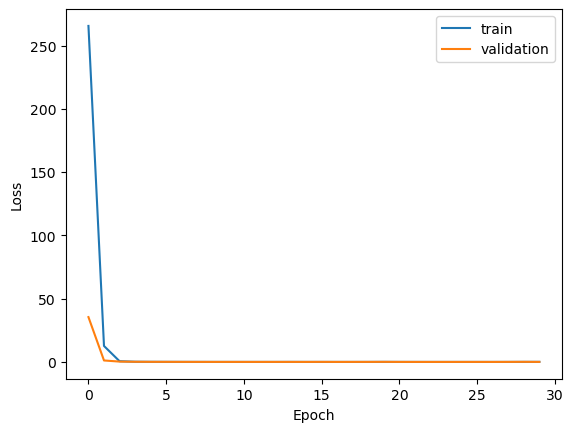

In [138]:
# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [139]:
#turn the scaled data back into the original data
X_test_df = Xscaler.inverse_transform(X_test)
y_test_df = yscaler.inverse_transform(y_test)
y_pred_df = yscaler.inverse_transform(y_pred)


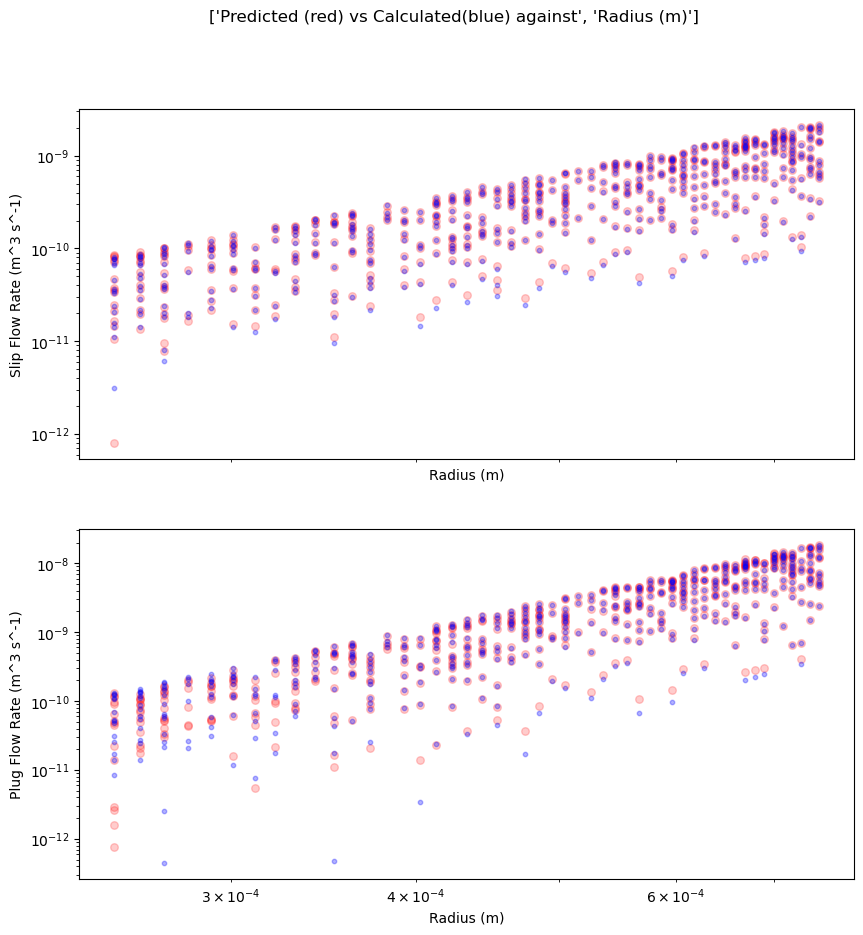

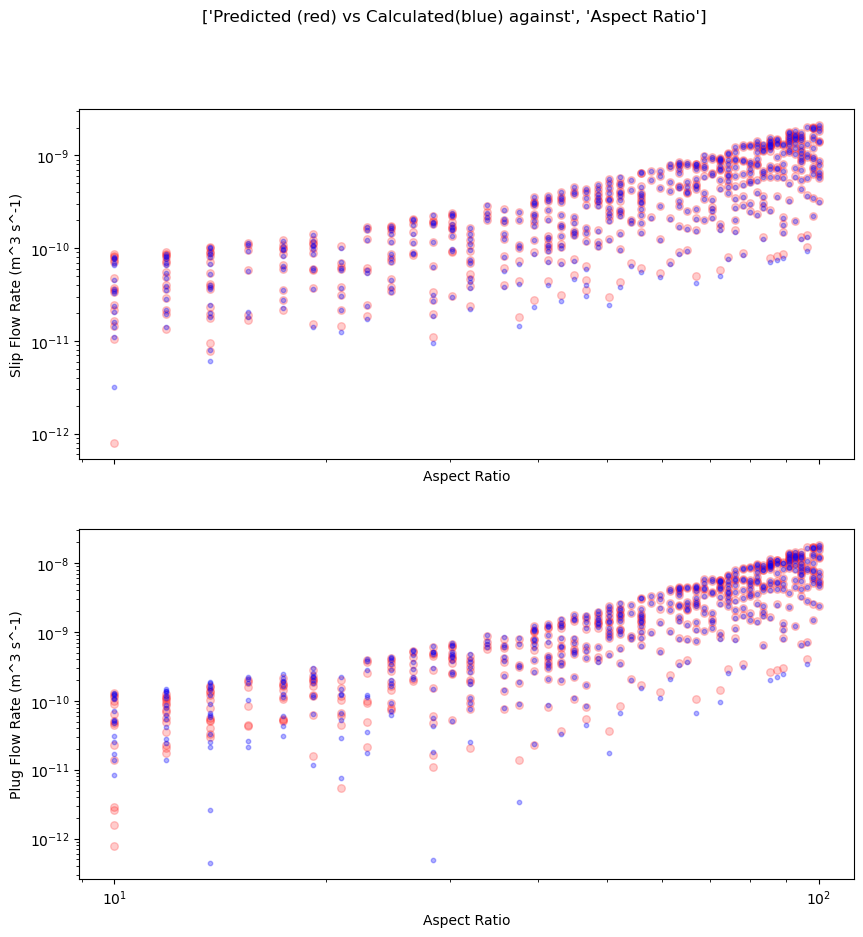

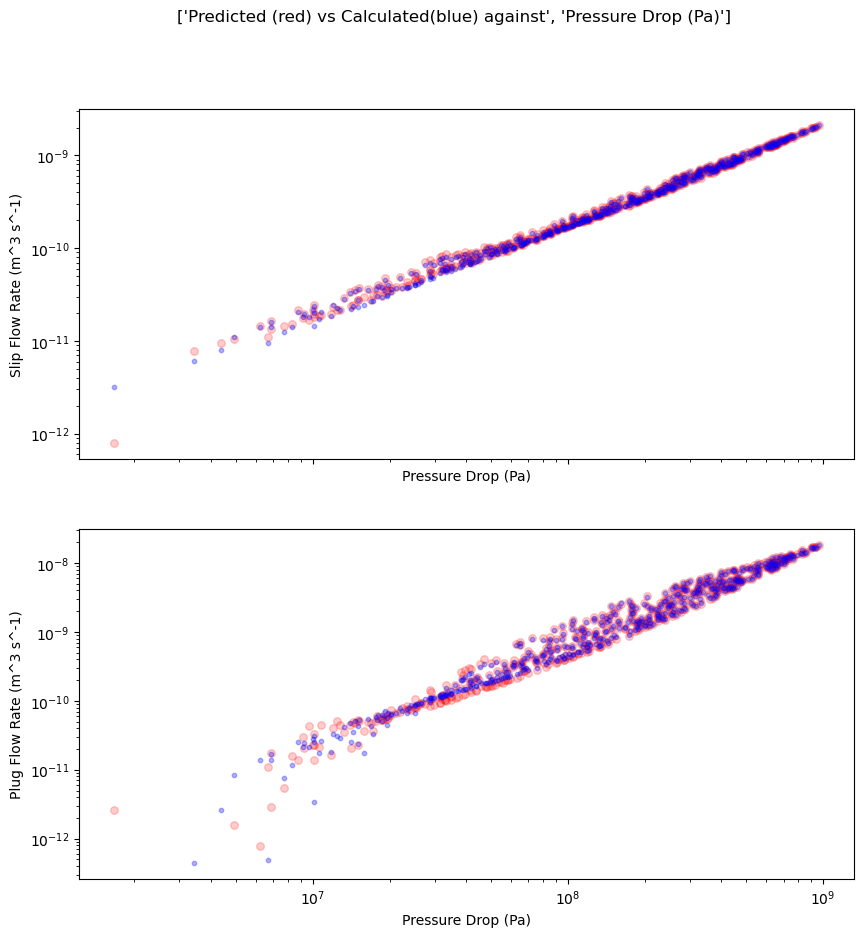

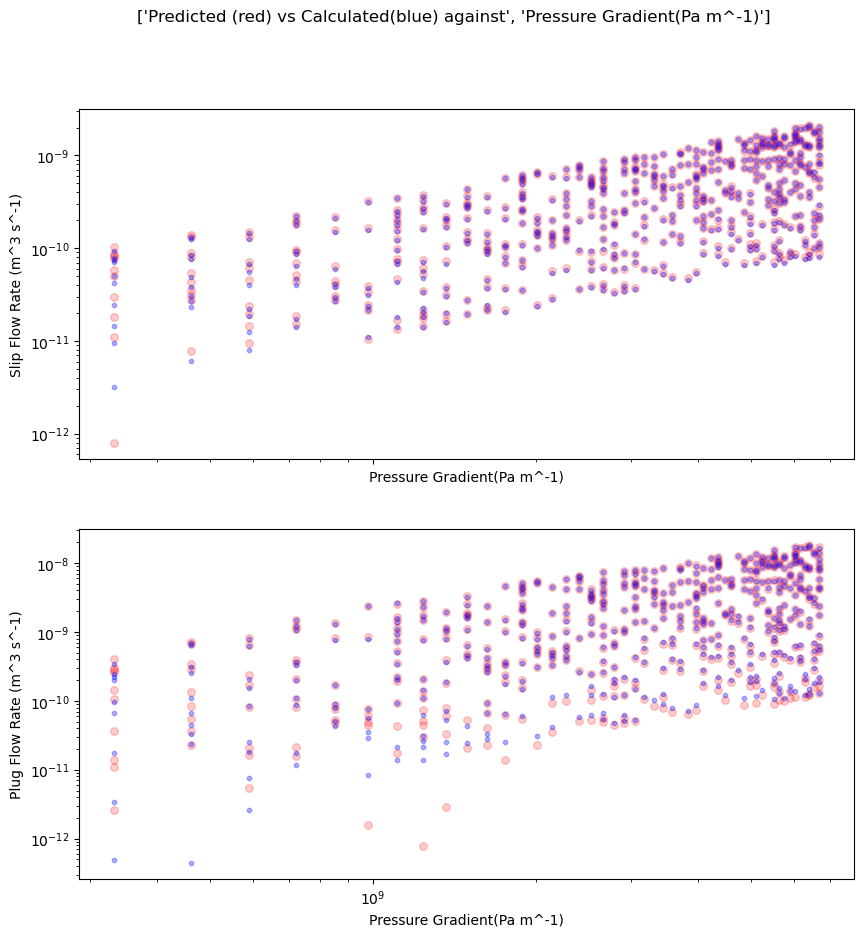

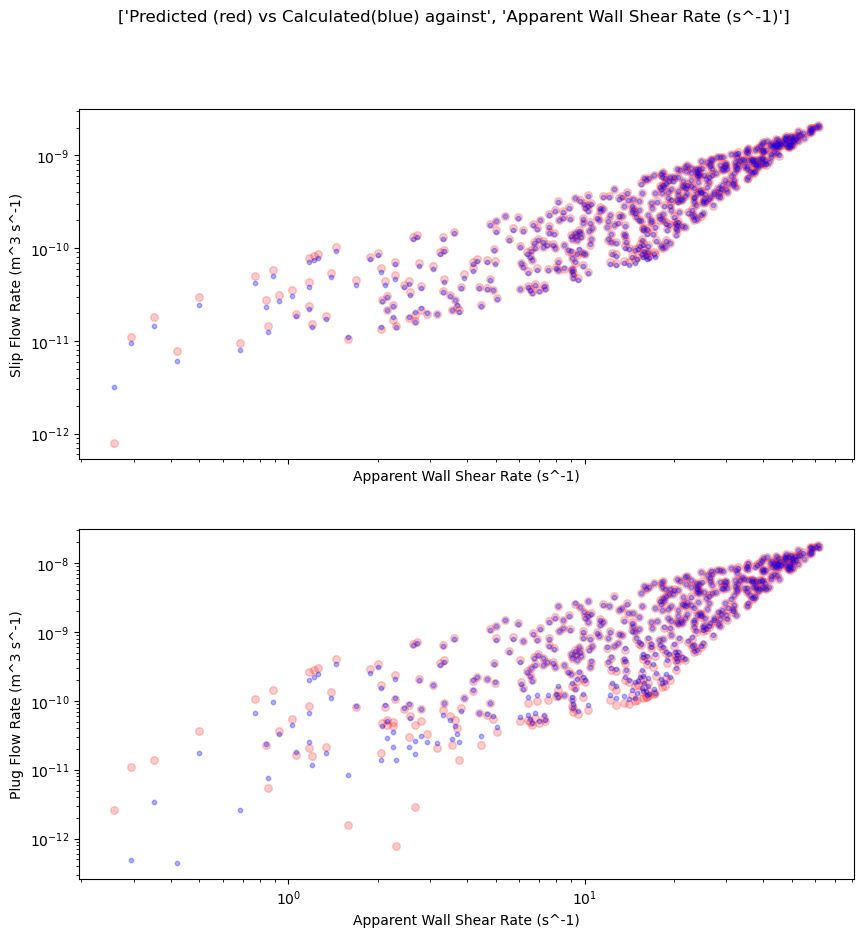

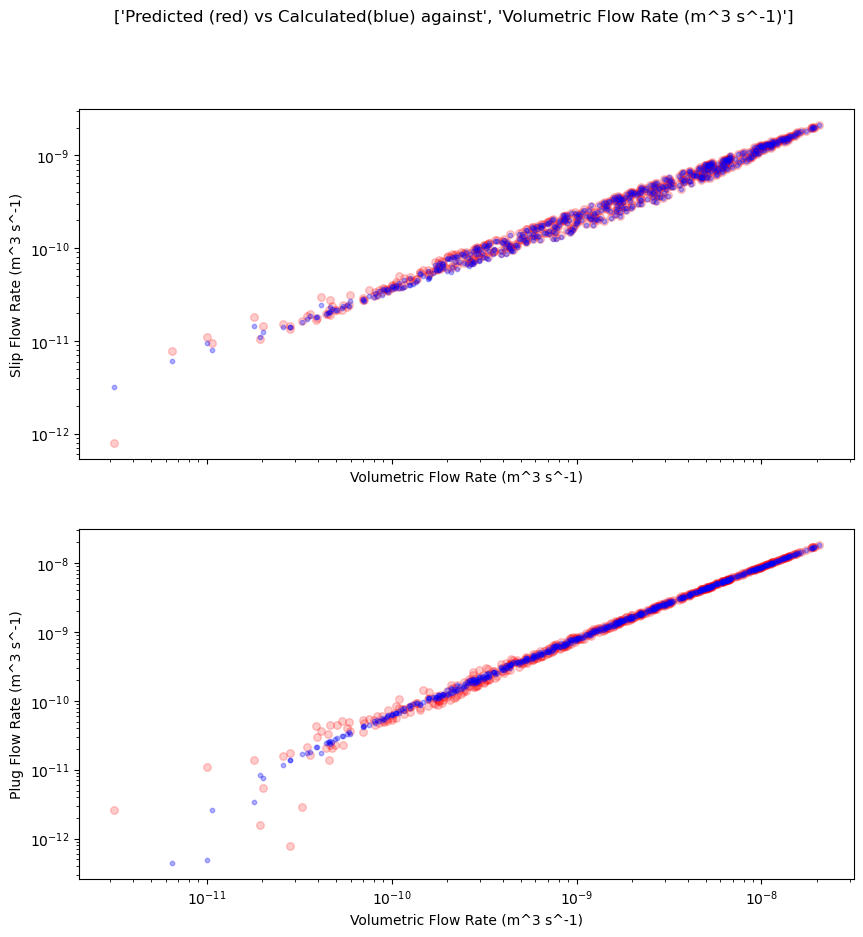

In [141]:
for k in range(6):
    counter = 0
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    for i in range(2):
        for j in range(1):
            axs[i].scatter(X_test_df[:, k], y_pred_df[:, counter], alpha = 0.2, label = 'Predicted', color = 'red', s=30)
            axs[i].scatter(X_test_df[:, k], y_test_df[:, counter], alpha = 0.3, label = 'Calculated', color = 'blue', s=10)
            axs[i].set_ylabel(Target_Values.columns[counter])
            axs[i].set_xlabel(Theoretical_data.columns[k])
            axs[i].set_yscale('log')
            axs[i].set_xscale('log')
            counter = counter+1


    fig.suptitle(['Predicted (red) vs Calculated(blue) against', Theoretical_data.columns[k]])

In [121]:
#once the model is validated with the test data, we can use the model to predict values of Qslip and Qbulk for all the theoretical data
Theoretical_data_scaled = Xscaler.transform(Theoretical_data)
y_pred_all = model.predict(Theoretical_data_scaled)

#turn the scaled data back into the original data
Theoretical_data_df = Xscaler.inverse_transform(Theoretical_data_scaled)
y_pred_all_df = yscaler.inverse_transform(y_pred_all)

#add the predicted values to the theoretical data
Theoretical_data['Qslip'] = y_pred_all_df[:, 0]
Theoretical_data['Qbulk'] = y_pred_all_df[:, 1]


79/79 [==============================] - 0s 2ms/step


In [133]:
Theoretical_data.describe()

,Radius (m),Aspect Ratio,Pressure Drop (Pa),Pressure Gradient(Pa m^-1),Apparent Wall Shear Rate (s^-1),Volumetric Flow Rate (m^3 s^-1),Qslip,Qbulk
count,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03
mean,0.000500,55.000000,2.199156e+08,3.501500e+09,19.729386,3.110650e-09,4.295163e-10,2.692279e-09
std,0.000147,26.510982,2.079256e+08,1.866668e+09,13.898773,3.954391e-09,4.383124e-10,3.529178e-09
min,0.000250,10.000000,1.665000e+06,3.330000e+08,0.257805,3.163741e-12,3.286464e-12,-1.210371e-11
25%,0.000372,32.040816,5.712967e+07,1.884918e+09,8.667842,3.774759e-10,1.010328e-10,2.766583e-10
50%,0.000500,55.000000,1.472725e+08,3.501500e+09,17.139896,1.396429e-09,2.629628e-10,1.143171e-09
75%,0.000628,77.959184,3.237885e+08,5.118082e+09,28.251857,4.353658e-09,6.189967e-10,3.712899e-09
max,0.000750,100.000000,1.000500e+09,6.670000e+09,64.042292,2.121976e-08,2.200913e-09,1.900957e-08


In [129]:
Theoretical_data['Qslip']+Theoretical_data['Qbulk']-Theoretical_data['Volumetric Flow Rate (m^3 s^-1)']

0       2.048641e-11
1      -5.346694e-12
2      -1.282536e-11
3      -1.195988e-11
4      -5.636311e-12
            ...     
2495   -1.564700e-12
2496    8.879167e-12
2497    1.742736e-11
2498    2.684167e-11
2499   -9.282989e-12
Length: 2500, dtype: float64

In [123]:
#import the new target data into a pandas dataframe
Target_Values_2 = pd.read_csv('Target_Data_2.csv')

#look at the first few rows of the data
display(Target_Values_2.head())


,Yield Stress (Pa),Slip Yield Stress (Pa),Beta,Shear Thinning Index,Viscosity Consistency (Pa s^n)
0,50000.0,5000.0,5.000000e-10,0.67,1100.0
1,50000.0,5000.0,5.000000e-10,0.67,1100.0
2,50000.0,5000.0,5.000000e-10,0.67,1100.0
3,50000.0,5000.0,5.000000e-10,0.67,1100.0
4,50000.0,5000.0,5.000000e-10,0.67,1100.0


In [122]:
#Build a new model to predict ty, tys, beta, n, and m
# Define the model architecture
model_2 = keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(6,)), # Input layer
    layers.Dense(64, activation='elu'), # Hidden layer1
    layers.Dense(32, activation='elu'), # Hidden layer2
    layers.Dense(16, activation='elu'), # Hidden layer3
    layers.Dense(8, activation='elu'), # Hidden layer4
    layers.Dense(2) # No activation function for the output layer (linear activation function
])

# Compile the model
model_2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
loss_2 = model_2.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)